# electronic layer scattering

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nexus as nx

layer = nx.Layer(id = "iron oxide layer",
                 thickness = 100,
                 composition = [["Fe", 2], ["O", 3]],
                 density = 5.3)

# at 20 keV
print(layer.ElectronicRefractiveIndex(20e3))

(0.9999973584409794+4.584833260616212e-08j)


In [3]:
mat = nx.Material.Template(nx.lib.material.Fe_enriched)

site = nx.Hyperfine(magnetic_field = 33)

mat.hyperfine_sites = [site]

layer = nx.Layer(id = "my iron oxide layer",
                 thickness = 1000,  # in nanometer
                 material = mat,
                 roughness = 30,
                 thickness_fwhm = 50)

detuning = [0]

matrix = layer.GrazingLayerMatrix(nx.lib.moessbauer.Fe57, detuning, 0.2)

print(np.squeeze(matrix))

[[-4.02131424e+63-3.71188107e+63j -3.71188107e+63+4.02131424e+63j
  -1.36403869e+63+5.83719668e+63j  5.83719668e+63+1.36403869e+63j]
 [ 3.71188107e+63-4.02131424e+63j -4.02131424e+63-3.71188107e+63j
  -5.83719668e+63-1.36403869e+63j -1.36403869e+63+5.83719668e+63j]
 [ 1.36403869e+63-5.83719668e+63j -5.83719668e+63-1.36403869e+63j
  -6.29886297e+63+1.85419632e+63j  1.85419632e+63+6.29886297e+63j]
 [ 5.83719668e+63+1.36403869e+63j  1.36403869e+63-5.83719668e+63j
  -1.85419632e+63-6.29886297e+63j -6.29886297e+63+1.85419632e+63j]]


In [4]:
mat = nx.Material.Template(nx.lib.material.Fe_enriched)

site = nx.Hyperfine(magnetic_field = 33)

mat.hyperfine_sites = [site]

layer = nx.Layer(id = "my iron oxide layer",
                 thickness = 1000,  # in nanometer
                 material = mat,
                 roughness = 30,
                 thickness_fwhm = 50)

sample = nx.Sample(layers = [layer],
                   geometry = "f")

detuning = [0]

matrix = sample.ObjectMatrix(nx.lib.moessbauer.Fe57, detuning, True)
# or
matrix = sample.SampleMatrix(nx.lib.moessbauer.Fe57, detuning)

print(np.squeeze(matrix))

[[-0.69665446+0.67094952j  0.04236449-0.04080134j]
 [-0.04236449+0.04080134j -0.69665446+0.67094952j]]


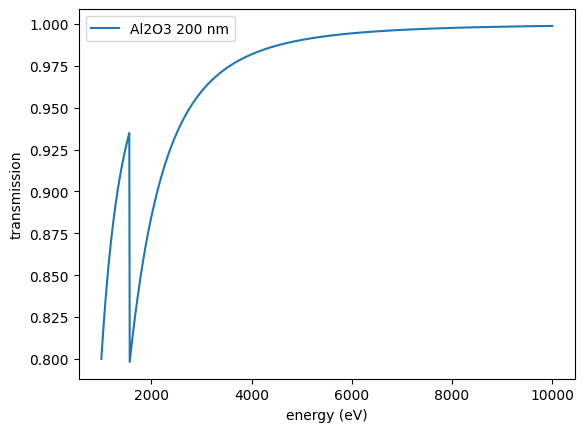

In [5]:
layer = nx.Layer(thickness = 200,
                 material = nx.Material.Template(nx.lib.material.Al2O3))

energies = np.linspace(1000, 10000, 1001)

trans = []

for elem in energies:
    trans.append(layer.ElectronicForwardTransmission(elem))

plt.plot(energies, trans, label = "Al2O3 200 nm")
plt.xlabel("energy (eV)")
plt.ylabel("transmission")
plt.legend()
plt.show()

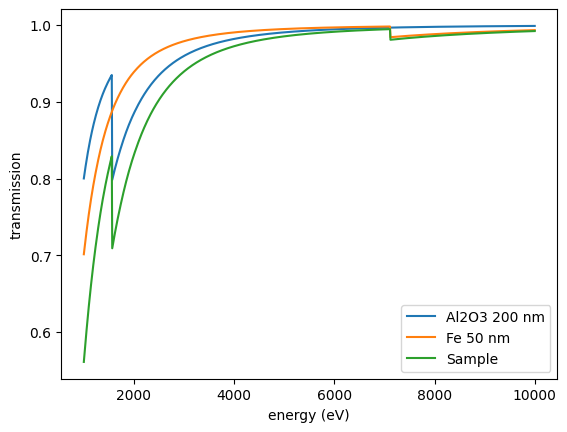

In [6]:
layer_Al2O3= nx.Layer(thickness = 200,
                 material = nx.Material.Template(nx.lib.material.Al2O3))

layer_Fe = nx.Layer(thickness = 50,
                 material = nx.Material.Template(nx.lib.material.Fe))

sample = nx.Sample(layers = [layer_Al2O3, layer_Fe],
                   geometry = "f")

energies = np.linspace(1000, 10000, 1001)

trans_Al2O3 = []
trans_Fe = []
trans_sample = []

for elem in energies:
    trans_Al2O3.append(layer_Al2O3.ElectronicForwardTransmission(elem))
    trans_Fe.append(layer_Fe.ElectronicForwardTransmission(elem))
    trans_sample.append(sample.ElectronicTransmission(elem))
    # or use trans_sample.append(sample.ElectronicForwardTransmission(elem))

plt.plot(energies, trans_Al2O3, label = "Al2O3 200 nm")
plt.plot(energies, trans_Fe, label = "Fe 50 nm")
plt.plot(energies, trans_sample, label = "Sample")
plt.xlabel("energy (eV)")
plt.ylabel("transmission")
plt.legend()
plt.show()